In [2]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
ckd = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week12/ckd.csv')
banknotes = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week12/banknote.csv')
cancer = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week12/breast-cancer.csv')

In [4]:
ckd.show(3)

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1


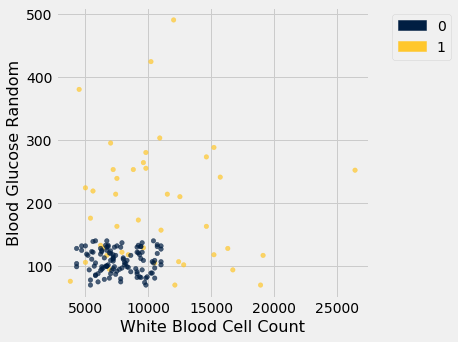

In [6]:
ckd.scatter("White Blood Cell Count", "Blood Glucose Random", colors="Class")

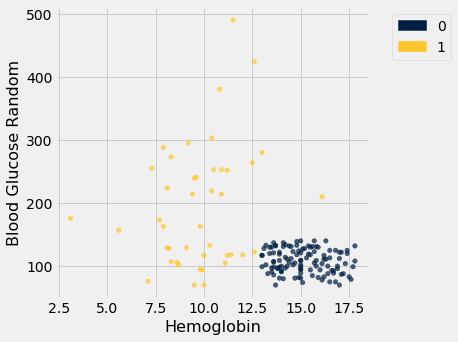

In [7]:
ckd.scatter("Hemoglobin", "Blood Glucose Random", colors="Class")

In [8]:
banknotes.show(3)

WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0


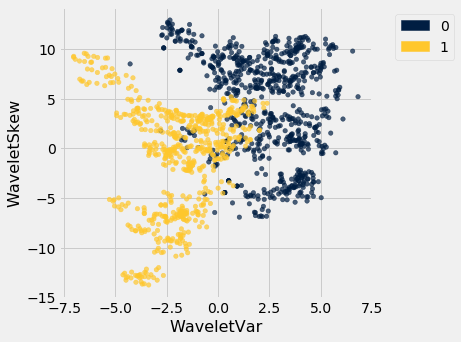

In [10]:
banknotes.scatter(0,1, colors="Class")

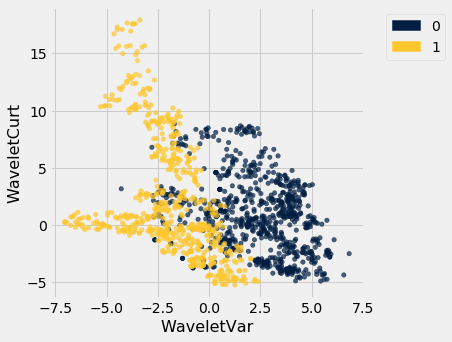

In [11]:
banknotes.scatter(0,2, colors="Class")

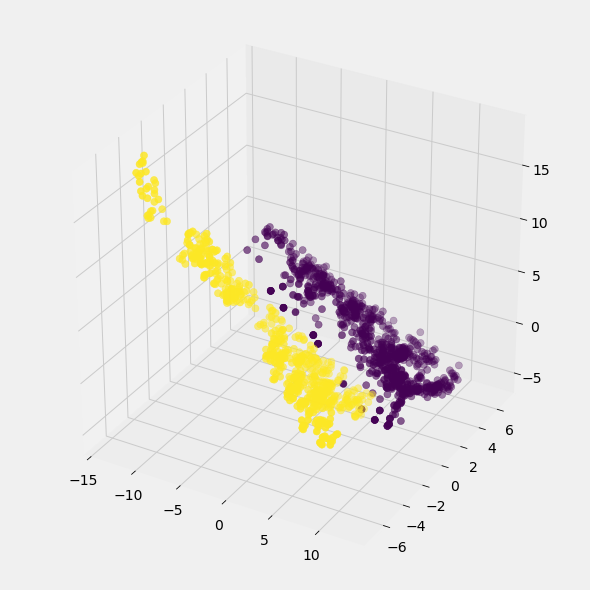

In [12]:
fig = plots.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
           banknotes.column('WaveletCurt'), 
           c=banknotes.column('Class'),
          s=50);

In [13]:
cancer.show(3)

ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,0
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0


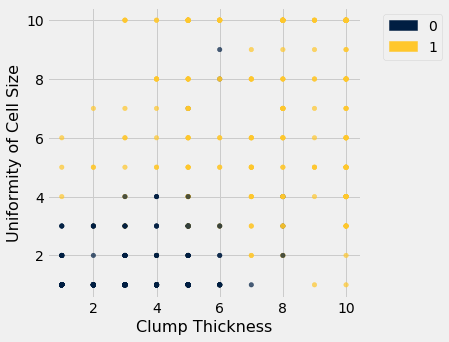

In [14]:
cancer.scatter(1,2,colors="Class")

In [15]:
def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))

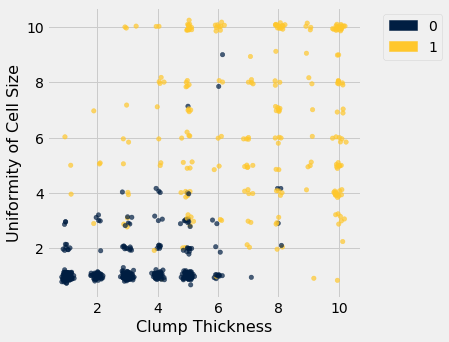

In [17]:
randomized_data = Table().with_column("Clump Thickness", randomize_column(cancer.column(1))).with_column("Uniformity of Cell Size", randomize_column(cancer.column(2))).with_column("Class", cancer.column("Class"))
randomized_data.scatter(0,1,colors="Class")

In [27]:
cancer.row(0)

Row(ID=1000025, Clump Thickness=5, Uniformity of Cell Size=1, Uniformity of Cell Shape=1, Marginal Adhesion=1, Single Epithelial Cell Size=2, Bare Nuclei=1, Bland Chromatin=3, Normal Nucleoli=1, Mitoses=1, Class=0)

In [28]:
np.array(cancer.row(0))

array([1000025,       5,       1,       1,       1,       2,       1,
             3,       1,       1,       0])

In [24]:
point1 = np.array(cancer.row(0))
point2 = np.array(cancer.row(500))
np.sqrt(sum((point1-point2)**2))

313300.00052186404

In [25]:
cancer_with_id = cancer.drop(0)
cancer_with_id.show(3)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,1,1,1,2,1,3,1,1,0
5,4,4,5,7,10,3,2,1,0
3,1,1,1,2,2,3,1,1,0


In [26]:
def distance(arr1, arr2):
    return np.sqrt(sum((arr1-arr2)**2))
point1 = np.array(cancer_with_id.row(0))
point2 = np.array(cancer_with_id.row(500))
distance(point1,point2)

18.083141320025124

In [30]:
def row_distance(row1,row2):
    return distance(np.array(row1),np.array(row2))
row_distance(cancer_with_id.row(0),cancer_with_id.row(500))

18.083141320025124

In [32]:
example = cancer_with_id.drop("Class").row(0)
training = cancer_with_id.exclude(0)

In [34]:
row_distance(example, training.drop("Class").row(250))

11.789826122551595

In [45]:
def compute_distances(training, example):
    distances = make_array()
    for row in training.drop("Class").rows:
        distances = np.append(distances, row_distance(row, example))
    return distances
Table().with_column("Distance",compute_distances(training, example)).sort("Distance")

Distance
0
0
0
0
0
0
1
1
1
1


In [47]:
def k_nearest_neighbours(training, example, k):
    distances = compute_distances(training, example)
    distance_table = training.with_column("Distance", distances)
    sorted_distance_table = distance_table.sort("Distance")
    return sorted_distance_table.take(np.arange(k))
knn = k_nearest_neighbours(training, example,11)

In [50]:
knn.group("Class").sort("count", descending=True).row(0).item(0)

0

In [51]:
def knn_classifier(training2, example2, k):
    neighbours = k_nearest_neighbours(training2, example2, k)
    return neighbours.group("Class").sort("count", descending=True).row(0).item(0)
knn_classifier(training, example,11)

0

In [52]:
example2 = cancer_with_id.drop("Class").row(550)
example2

Row(Clump Thickness=5, Uniformity of Cell Size=7, Uniformity of Cell Shape=10, Marginal Adhesion=10, Single Epithelial Cell Size=5, Bare Nuclei=10, Bland Chromatin=10, Normal Nucleoli=10, Mitoses=1)

In [55]:
knn_classifier(training, example2,11)

1